## Problem statement

The goal of this project is to predict the daily maximum temperature using weather details like humidity, wind speed, and pressure. Knowing the temperature in advance can help farmers, power companies, and people prepare for the day better.


## Target variable
To predict daily maximum temperatures using features such as humidity, wind speed, atmospheric pressure, and other weather indicators

MaxTemp (Maximum Temperature)

#Load and Understand the Data

In [22]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("/content/Weather Training Data.csv")
df.shape

(99516, 23)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99073 non-null  float64
 3   MaxTemp        99286 non-null  float64
 4   Rainfall       98537 non-null  float64
 5   Evaporation    56985 non-null  float64
 6   Sunshine       52199 non-null  float64
 7   WindGustDir    92995 non-null  object 
 8   WindGustSpeed  93036 non-null  float64
 9   WindDir9am     92510 non-null  object 
 10  WindDir3pm     96868 non-null  object 
 11  WindSpeed9am   98581 non-null  float64
 12  WindSpeed3pm   97681 non-null  float64
 13  Humidity9am    98283 non-null  float64
 14  Humidity3pm    97010 non-null  float64
 15  Pressure9am    89768 non-null  float64
 16  Pressure3pm    89780 non-null  float64
 17  Cloud9am       61944 non-null  float64
 18  Cloud3

In [24]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,99073.000000,99286.000000,98537.000000,56985.00000,52199.000000,93036.000000,98581.000000,97681.000000,98283.000000,97010.000000,89768.000000,89780.000000,61944.000000,59514.000000,98902.000000,97612.000000,99516.000000
mean,12.176266,23.218513,2.353024,5.46132,7.615090,39.976966,14.004849,18.650464,68.866376,51.433296,1017.684638,1015.286204,4.447985,4.519122,16.970041,21.681340,0.224677
std,6.390882,7.115072,8.487866,4.16249,3.783008,13.581524,8.902323,8.801827,19.074951,20.777616,7.110166,7.045189,2.886580,2.716618,6.488961,6.931681,0.417372
min,-8.500000,-4.100000,0.000000,0.00000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.000000,-5.100000,0.000000
25%,7.600000,17.900000,0.000000,2.60000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.80000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.40000,10.600000,48.000000,19.000000,24.000000,83.000000,65.000000,1022.400000,1020.000000,7.000000,7.000000,21.500000,26.400000,0.000000
max,33.900000,48.100000,371.000000,86.20000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000


In [25]:
df.isnull().sum()

,0
row ID,0
Location,0
MinTemp,443
MaxTemp,230
Rainfall,979
Evaporation,42531
Sunshine,47317
WindGustDir,6521
WindGustSpeed,6480
WindDir9am,7006


# Data Cleaning (Fill/Drop Nulls)

In [26]:
# Drop columns with too many missing values
df = df.dropna(thresh=0.7*len(df), axis=1)

# Fill remaining nulls with median or mean
#  Why use median?--The median is not affected by outliers (unlike the mean)
df.fillna(df.median(numeric_only=True), inplace=True)


In [27]:
cols_drop = ['Temp3pm', 'RainTomorrow', 'Humidity3pm', 'Pressure9am']

df


,row ID,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,Row101816,Uluru,8.0,20.7,0.0,ESE,41.0,SE,E,19.0,26.0,56.0,32.0,1028.1,1024.3,11.6,20.0,No,0
99512,Row101817,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,0
99513,Row101818,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,0
99514,Row101819,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,0


In [28]:
df = pd.get_dummies(df, columns=['WindGustDir'], drop_first=True)


In [29]:
df.isnull().sum()

,0
row ID,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
WindGustSpeed,0
WindDir9am,7006
WindDir3pm,2648
WindSpeed9am,0
WindSpeed3pm,0


#  Data Visualization

In [30]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

numerical_cols = ['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm', 'Rainfall']
df = remove_outliers(df, numerical_cols)



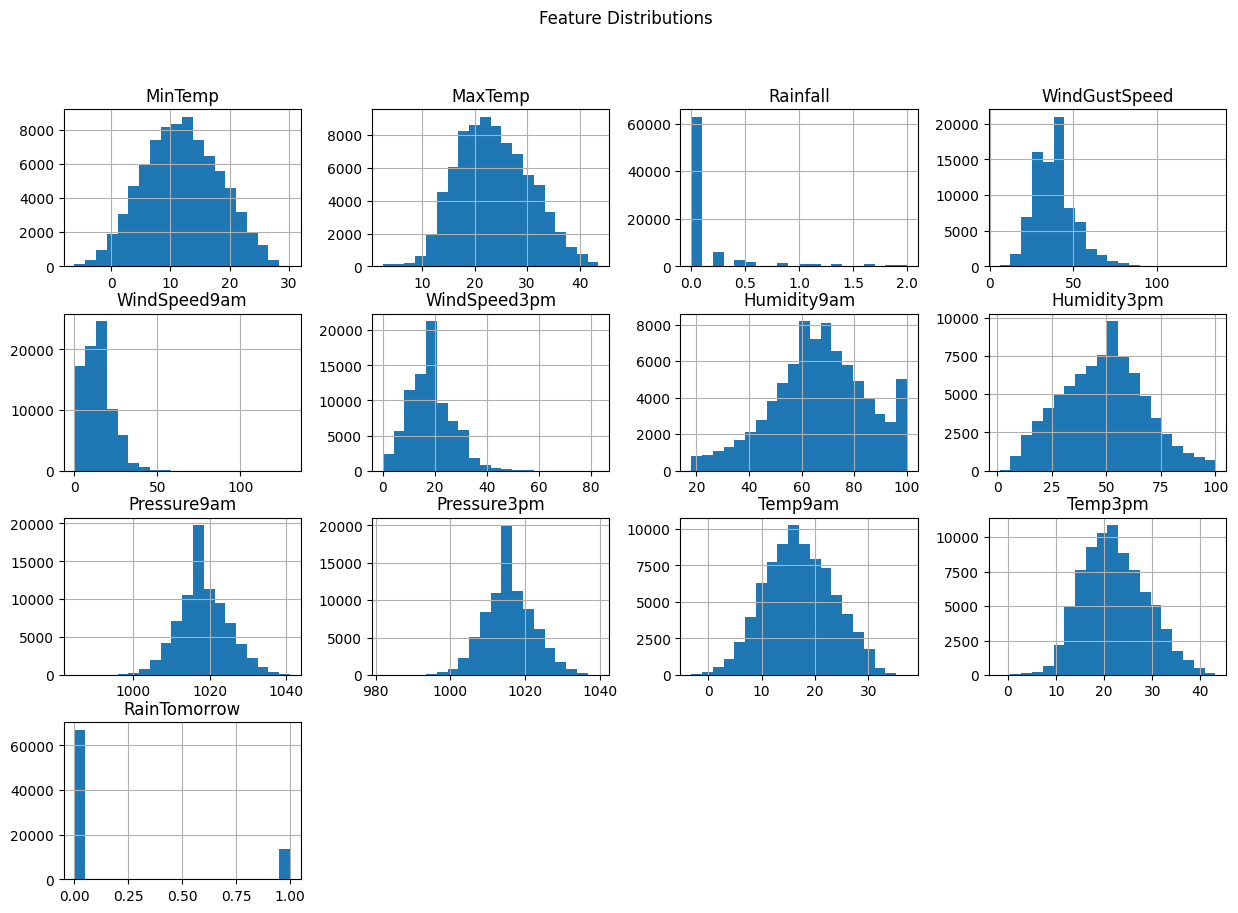

In [31]:
# Histograms
df.hist(figsize=(15, 10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()



In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80617 entries, 0 to 99515
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   row ID           80617 non-null  object 
 1   Location         80617 non-null  object 
 2   MinTemp          80617 non-null  float64
 3   MaxTemp          80617 non-null  float64
 4   Rainfall         80617 non-null  float64
 5   WindGustSpeed    80617 non-null  float64
 6   WindDir9am       74613 non-null  object 
 7   WindDir3pm       78542 non-null  object 
 8   WindSpeed9am     80617 non-null  float64
 9   WindSpeed3pm     80617 non-null  float64
 10  Humidity9am      80617 non-null  float64
 11  Humidity3pm      80617 non-null  float64
 12  Pressure9am      80617 non-null  float64
 13  Pressure3pm      80617 non-null  float64
 14  Temp9am          80617 non-null  float64
 15  Temp3pm          80617 non-null  float64
 16  RainToday        79660 non-null  object 
 17  RainTomorrow     

# Outlier Detection

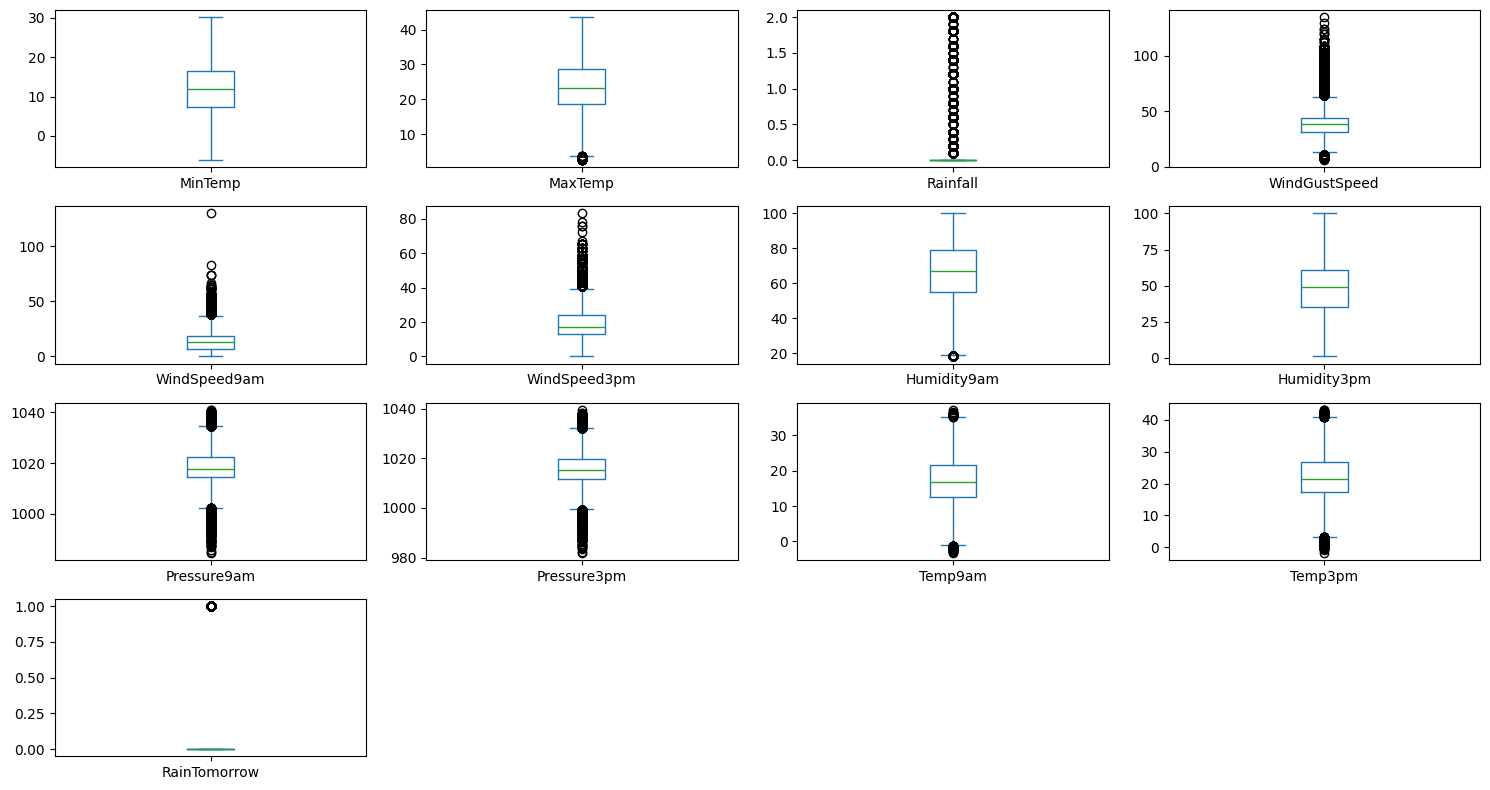

In [33]:
# Boxplot for outliers
df.select_dtypes(include=np.number).plot(kind='box', figsize=(15, 8), subplots=True, layout=(4, 4), sharex=False)
plt.tight_layout()
plt.show()


# Skewness Check

In [34]:
df.skew(numeric_only=True).sort_values(ascending=False)


,0
WindGustDir_NNW,4.282921
WindGustDir_NNE,4.125282
WindGustDir_ESE,3.961407
WindGustDir_WNW,3.940404
WindGustDir_NE,3.935061
WindGustDir_NW,3.869698
WindGustDir_SSW,3.840738
WindGustDir_WSW,3.821216
WindGustDir_SW,3.727460
WindGustDir_S,3.725583


# Feature & Target Selection

In [35]:
target = "MaxTemp"  # Replace with your actual target
X = df.drop(columns=[target])
y = df[target]


# Data Scaling

In [36]:
from sklearn.preprocessing import StandardScaler

# Step 1: Select only numeric columns from X
X_numeric = X.select_dtypes(include=['number'])

# Step 2: Standardize (Z-score scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)


#  PCA (Dimensionality Reduction)

In [37]:
pca = PCA(n_components=0.95)  # retain 95% variance
X_pca = pca.fit_transform(X_scaled)
print(f"Original shape: {X_scaled.shape}, PCA shape: {X_pca.shape}")



Original shape: (80617, 12), PCA shape: (80617, 8)


#  Train/Test Split

In [38]:
# Combine features and target temporarily
df_model = pd.concat([X, y], axis=1)

# Remove rows with NaNs or outliers from full dataset
df_model.dropna(inplace=True)

# Now split again
X_cleaned = df_model.drop('MaxTemp', axis=1)
y_cleaned = df_model['MaxTemp']


# Modeling Functions & Evaluation

In [45]:
def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R² Score:", r2_score(y_test, y_pred))

# Baseline Model: Linear Regression
evaluate_model("Linear Regression", LinearRegression())

# Random Forest Regressor
evaluate_model("Random Forest", RandomForestRegressor())

# XGBoost Regressor
evaluate_model("XGBoost", xgb.XGBRegressor())

# Support Vector Regression
evaluate_model("SVR", SVR())

# K-Nearest Neighbors
evaluate_model("KNN", KNeighborsRegressor())




Linear Regression
MAE: 0.8723815629934163
RMSE: 1.362806201122374
R² Score: 0.9609859650269388

Random Forest
MAE: 0.669842959389451
RMSE: 1.0159774235034094
R² Score: 0.9783169295114836

XGBoost
MAE: 0.6467607704737263
RMSE: 0.9863725463258556
R² Score: 0.9795621776926499

SVR
MAE: 2.032130480656126
RMSE: 2.6064123955156284
R² Score: 0.8572950848749042

KNN
MAE: 1.3155147606053088
RMSE: 1.7769464469326823
R² Score: 0.9336713213683385


In [41]:
X = X.drop(['row ID'], axis=1)


In [43]:
X = pd.get_dummies(X, drop_first=True)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Documentation & Reporting

In [46]:
print("\n🔍 Summary:")
print("- Data shape:", df.shape)
print("- Nulls handled, outliers visualized")
print("- Used StandardScaler & PCA")
print("- Tried 5 Regression Models")
print("- Evaluation done with MAE, RMSE, R² Score")



🔍 Summary:
- Data shape: (80617, 33)
- Nulls handled, outliers visualized
- Used StandardScaler & PCA
- Tried 5 Regression Models
- Evaluation done with MAE, RMSE, R² Score
